In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loader text filen med simulations resultater teksten i '' er filnavn til simulation
Sim = pd.read_csv('Sim_2035_1985.txt', sep="\t", index_col="hour")

# det her renser dataframen lidt det behøves ik ændres i
if 'Unnamed: 404' in Sim.columns and Sim['Unnamed: 404'].isnull().all():
    Sim = Sim.drop('Unnamed: 404', axis=1)

In [3]:
#Her defineres de lav produktions perioder som blev fundet i Dataanalyse-2035.ipynb
low_energy = [(805,924),(1290,1409),(1492,1611),(4088,4207),(5425,5544),(6334,6453),(7149,7268),
              (7549,7668),(7758,7877),(8155,8274)]

In [4]:
# finder kolloner der indeholder de nodes. Hvis man ønsker at analysere andre lande skal de først tilføjes her
cols_to_keep = Sim.filter(like='DK1').columns.tolist() + \
               Sim.filter(like='DK2').columns.tolist() + \
               Sim.filter(like='DKBO').columns.tolist() + \
               Sim.filter(like='DKKF').columns.tolist() + \
               Sim.filter(like='DKEI').columns.tolist() + \
               Sim.filter(like='NOn').columns.tolist() + \
               Sim.filter(like='NOm').columns.tolist() + \
               Sim.filter(like='NOs').columns.tolist() + \
               Sim.filter(like='SE1').columns.tolist() + \
               Sim.filter(like='SE2').columns.tolist() + \
               Sim.filter(like='SE3').columns.tolist() + \
               Sim.filter(like='SE4').columns.tolist() + \
               Sim.filter(like='DELU').columns.tolist() + \
               Sim.filter(like='NL').columns.tolist() + \
               Sim.filter(like='FR').columns.tolist()

cols_to_keep = [*set(cols_to_keep)]
# subsetter dataframen såde kun indeholder overstående kolloner
Sim_subset = Sim[cols_to_keep]

In [5]:
# sørger for at dataframen kun indeholder lav energi perioderne
low_energy_rows_focus = pd.DataFrame()

for period in low_energy:
    low_energy_rows_focus = pd.concat([low_energy_rows_focus, Sim_subset.loc[period[0]:period[1]]])

In [6]:
#Fjerner duplicates
low_energy_rows_focus = low_energy_rows_focus.loc[:, ~low_energy_rows_focus.columns.duplicated()]

In [7]:
#Her defineres en funktion der plotter produktionen for et givent land.
def plot_stack_production(df, country, period):
    """
    Plotter hver energi produktions kilde for hvert time. det plottes som et stacked bar graph hvor hver produktion
    kilde plottes ovenpå hinanden.

    Parametere:
        df (DataFrame): Den dataframe der indeholder det ønskede datasæt det kan enten være Sim_subset hvis man ønsker
        en generel plot hvor alle timer kan bruges eller det kan være low_energy_rows_focus hvis man ønsker lav
        energi produktions perioderne.
        country (str): Det land der undersøges det kunne f.eks. være 'DK1'
        period (tuple): En periode som er defineret som en tuple (start_hour, end_hour).
    """
    # Definerer energi kilderne som skal plottes
    energy_sources = ['ICHP', 'Wind', 'Solar', 'ROR', 'CKV_BP', 'CKV_EX', 'CKV_GT', 'DKV_CC', 'DKV_affald',
                      'DKV_GM', 'DKV_bio', 'CKV_affald', 'DKV_GT', 'DKV_bio', 'Regulerkraft', 'KYV22', 'CKV_DI',
                      'HydroRes', 'OtherRes', 'OtherNonRes', 'DSR', 'Battery', 'MustRun', 'GasUdland',
                      'NuclearSweden', 'KulUdland', 'OlieUdland', 'HydroPumpCL', 'Borssele', 'Biofuels']

    # Subsetter datasættet så det kun er for den givne periode og land
    subset = df.filter(like=country)
    subset = subset.loc[period[0]:period[1]]

    # Summerer produktion over alle kilder
    production_by_source = {}
    for source in energy_sources:
        production_by_source[source] = subset.filter(like=source).sum().sum()

    # Plotter dataen som et stacked bar graph
    fig, ax = plt.subplots()
    hourly_production = subset.filter(like='ICHP').sum(axis=1).to_frame(name='ICHP')
    hourly_production['Wind'] = subset.filter(like='Wind').sum(axis=1)
    hourly_production['Solar'] = subset.filter(like='Solar').sum(axis=1)
    hourly_production['ROR'] = subset.filter(like='ROR').sum(axis=1)
    hourly_production['CKV_BP'] = subset.filter(like='CKV_BP').sum(axis=1)
    hourly_production['CKV_EX'] = subset.filter(like='CKV_EX').sum(axis=1)
    hourly_production['CKV_GT'] = subset.filter(like='CKV_GT').sum(axis=1)
    hourly_production['DKV_CC'] = subset.filter(like='DKV_CC').sum(axis=1)
    hourly_production['DKV_affald'] = subset.filter(like='DKV_affald').sum(axis=1)
    hourly_production['DKV_GM'] = subset.filter(like='DKV_GM').sum(axis=1)
    hourly_production['DKV_bio'] = subset.filter(like='DKV_bio').sum(axis=1)
    hourly_production['CKV_affald'] = subset.filter(like='CKV_affald').sum(axis=1)
    hourly_production['DKV_GT'] = subset.filter(like='DKV_GT').sum(axis=1)
    hourly_production['DKV_bio'] = subset.filter(like='DKV_bio').sum(axis=1)
    hourly_production['Regulerkraft'] = subset.filter(like='Regulerkraft').sum(axis=1)
    hourly_production['KYV22'] = subset.filter(like='KYV22').sum(axis=1)
    hourly_production['CKV_DI'] = subset.filter(like='CKV_DI').sum(axis=1)
    hourly_production['HydroRes'] = subset.filter(like='HydroRes').sum(axis=1)
    hourly_production['OtherRes'] = subset.filter(like='OtherRes').sum(axis=1)
    hourly_production['OtherNonRes'] = subset.filter(like='OtherNonRes').sum(axis=1)
    hourly_production['DSR'] = subset.filter(like='DSR').sum(axis=1)
    hourly_production['Battery'] = subset.filter(like='Battery').sum(axis=1)
    hourly_production['MustRun'] = subset.filter(like='MustRun').sum(axis=1)
    hourly_production['GasUdland'] = subset.filter(like='GasUdland').sum(axis=1)
    hourly_production['NuclearSweden'] = subset.filter(like='NuclearSweden').sum(axis=1)
    hourly_production['KulUdland'] = subset.filter(like='KulUdland').sum(axis=1)
    hourly_production['OlieUdland'] = subset.filter(like='OlieUdland').sum(axis=1)
    hourly_production['HydroPumpCL'] = subset.filter(like='HydroPumpCL').sum(axis=1)
    hourly_production['Borssele'] = subset.filter(like='Borssele').sum(axis=1)
    hourly_production['Biofuels'] = subset.filter(like='Biofuels').sum(axis=1)

    # Hvis energi kilden har produktion som er non-zero tilføjes de til listen
    non_zero_sources = [source for source in energy_sources if production_by_source[source] > 0]

    # opdaterer hourly_production så den kun indeholder non-zero produktion
    hourly_production = hourly_production[non_zero_sources]

    # laver et stacked bar chart for den nuværende periode og land med det opdaterede dataframe
    hourly_production.plot(kind='bar', stacked=True, ax=ax)

    # Sørger for legenden kun viser non-zero produktion
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10}, ncol=2, handlelength=1, handleheight=1, labels=non_zero_sources)

    #sætter titler og labels
    ax.set_title(f'{country} ({period[0]}-{period[1]})')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Energy production (MWh)')
    xticks = range(0, len(hourly_production), 10)
    ax.set_xticks(xticks)

    #Printer plottet
    plt.show()

### Herunder er plot funktionen kørt igennem alle perioder for landende i cols_to_keep dette fylder ret meget og tager også lang tid at kører igennem. man kunne alternativt udkommentere de lande man ikke er interesseret i.
Funktionen kan også kaldes uden for et loop som f.eks. plot_stack_production(Sim_subset, 'DK1', (0,168)) hvis man ønsker den første uge

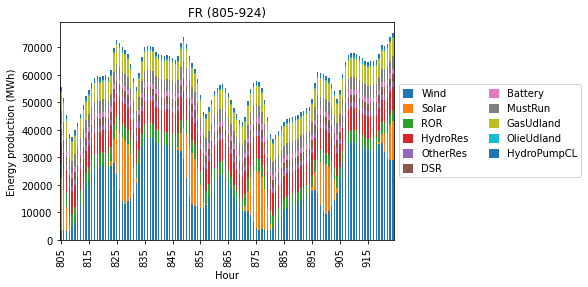

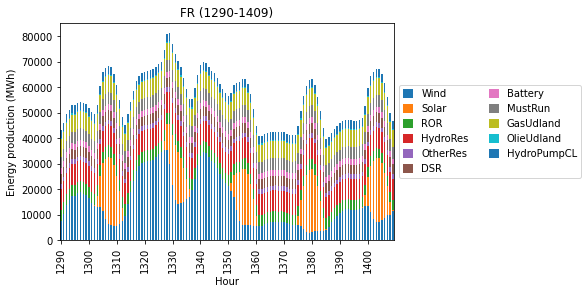

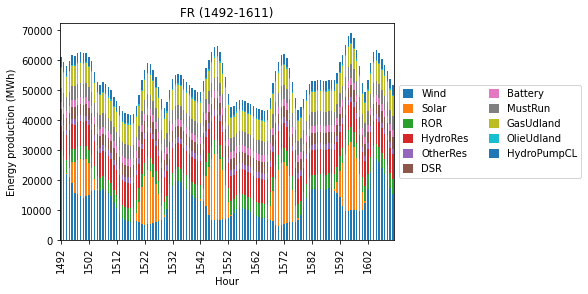

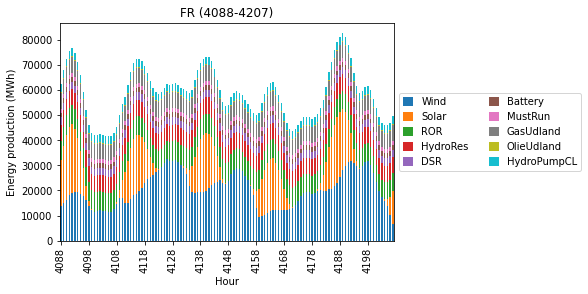

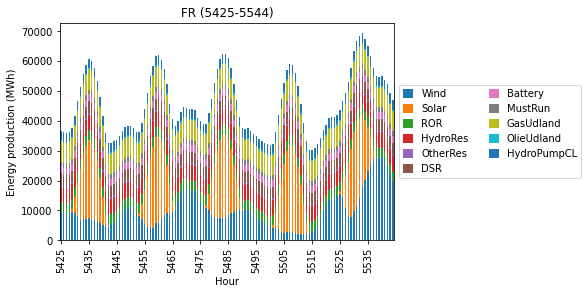

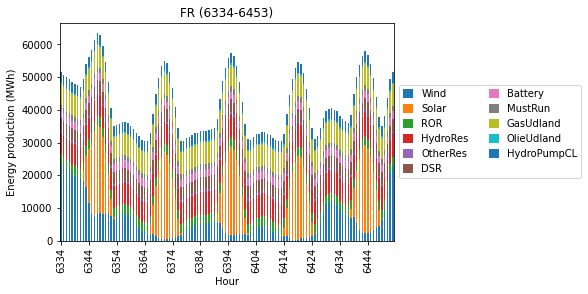

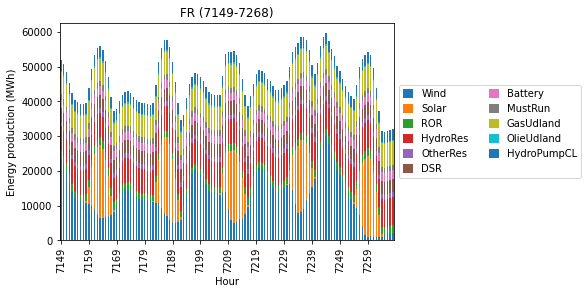

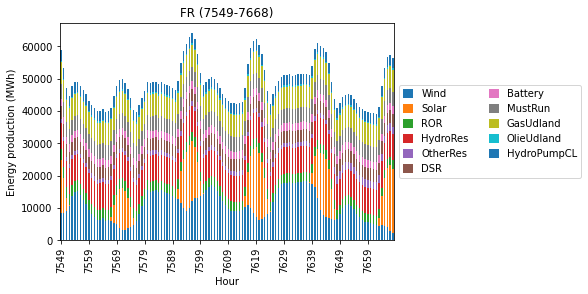

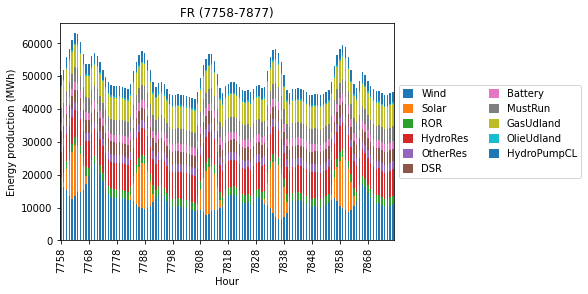

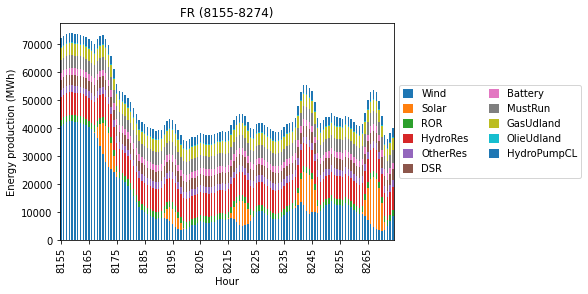

In [8]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'FR', period)

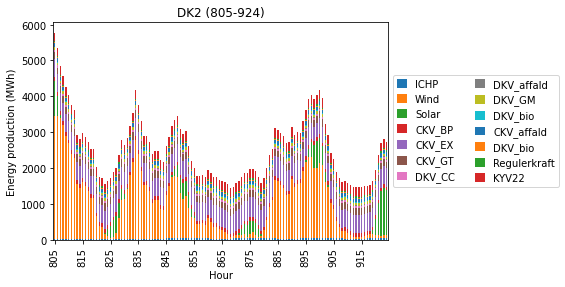

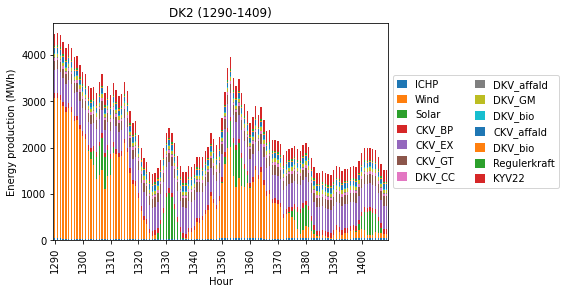

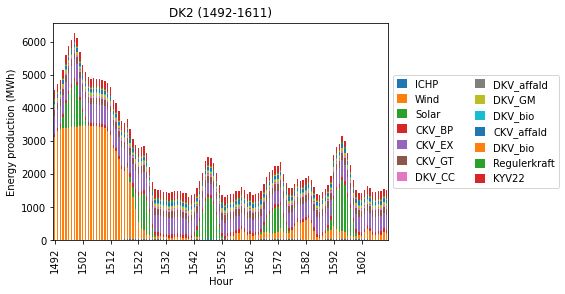

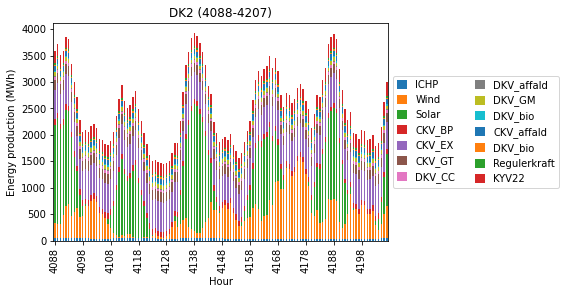

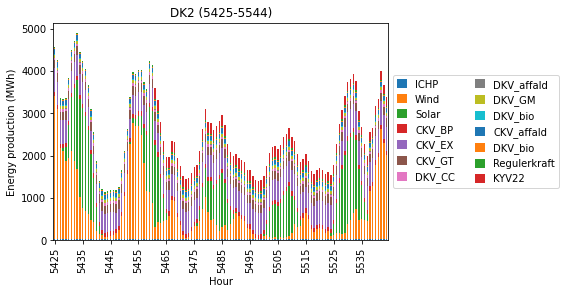

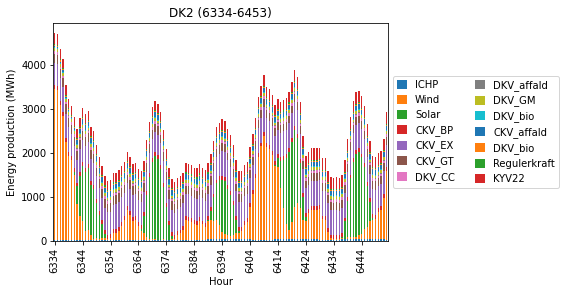

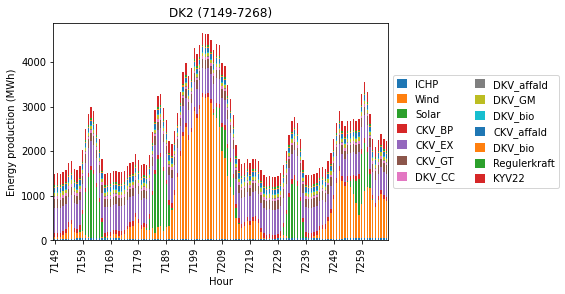

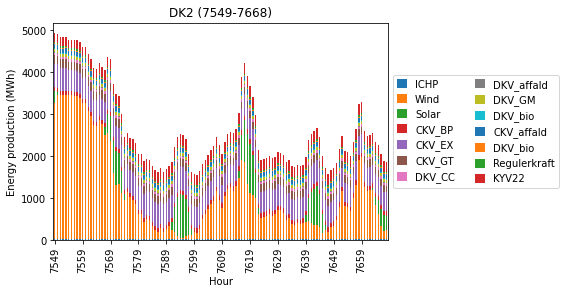

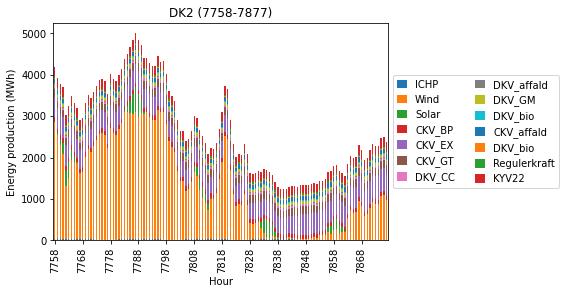

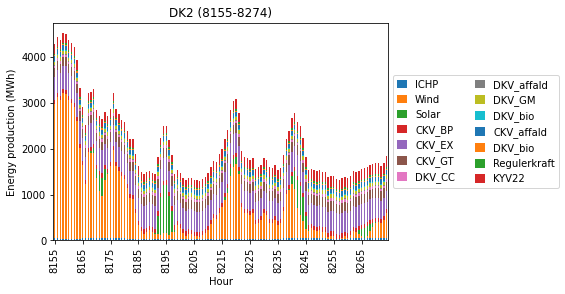

In [9]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'DK2', period)

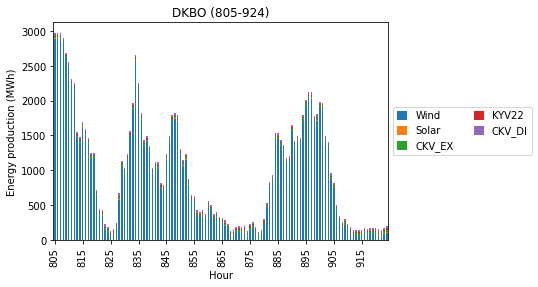

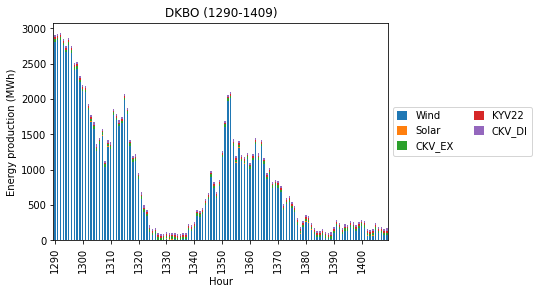

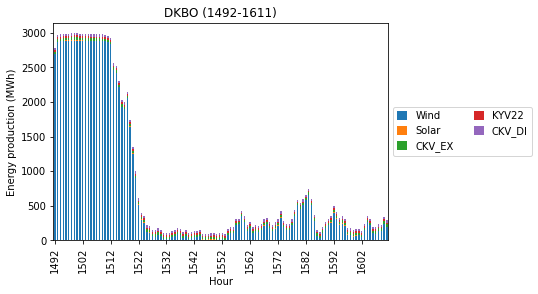

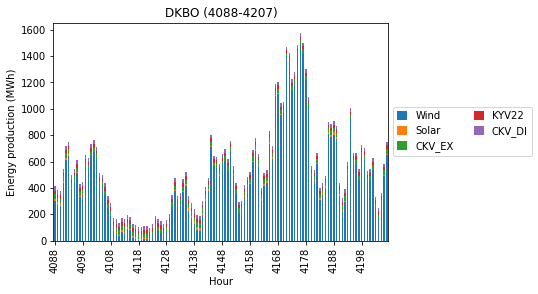

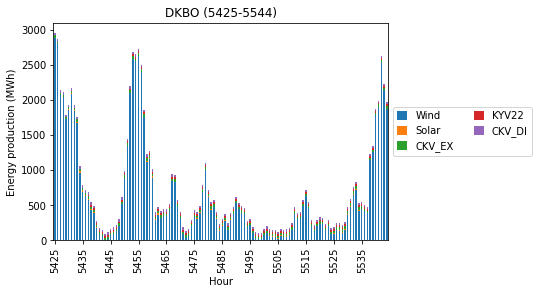

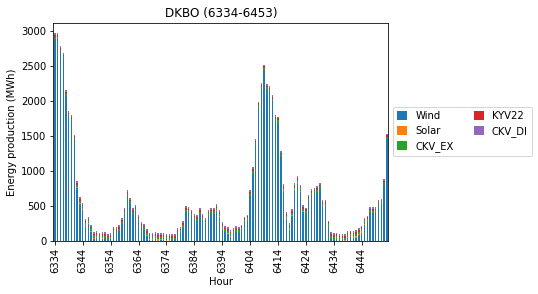

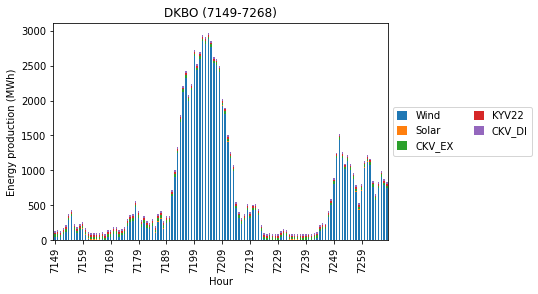

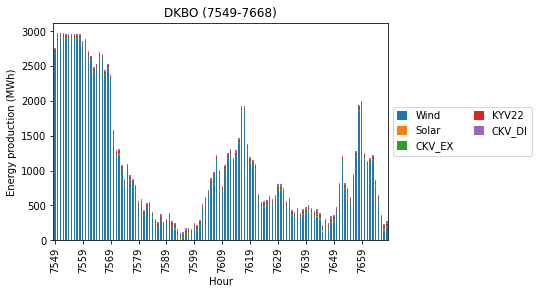

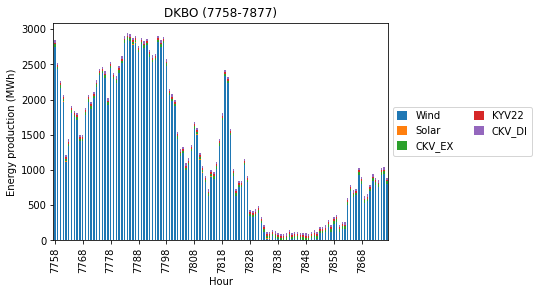

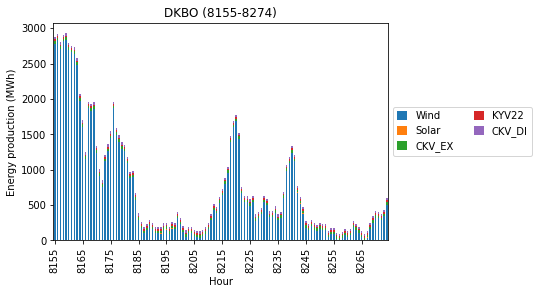

In [10]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'DKBO', period)

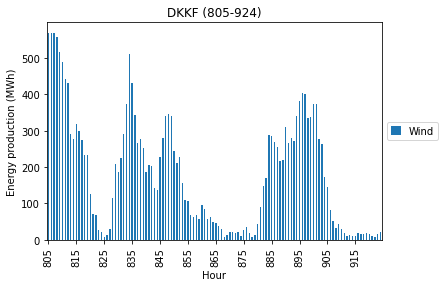

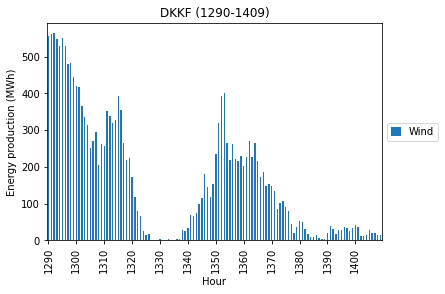

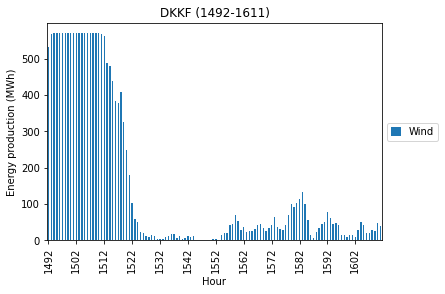

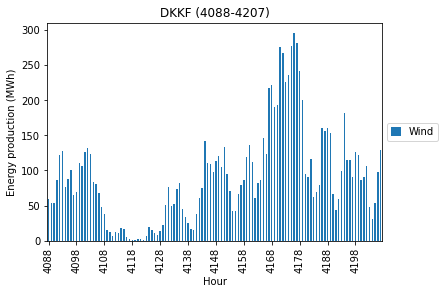

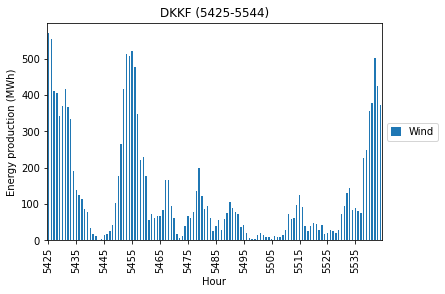

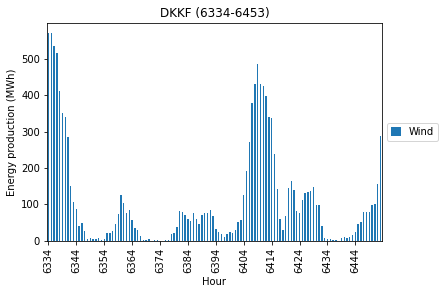

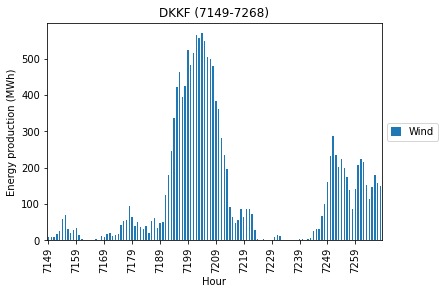

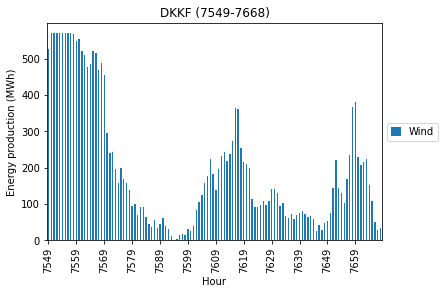

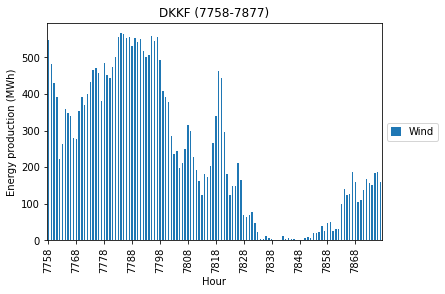

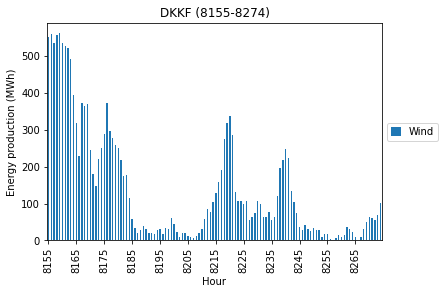

In [11]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'DKKF', period)

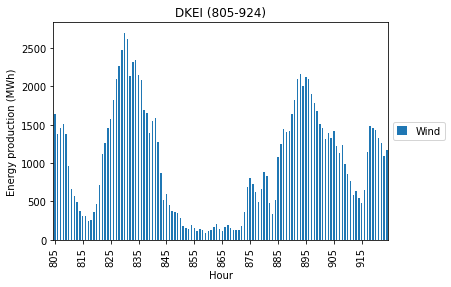

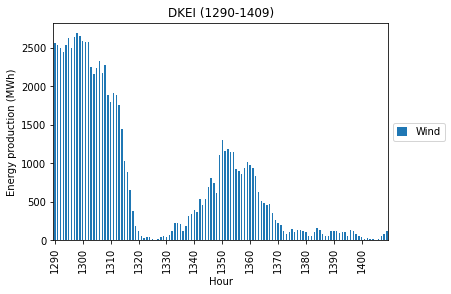

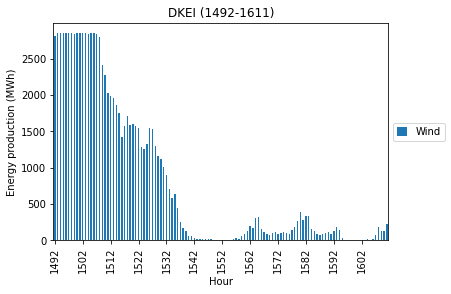

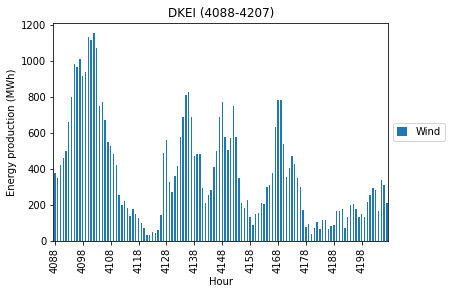

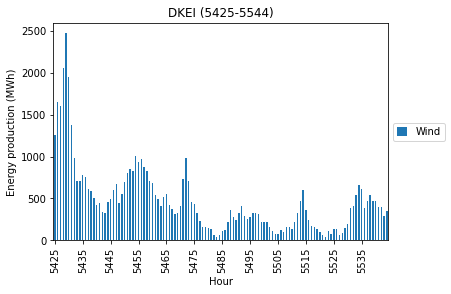

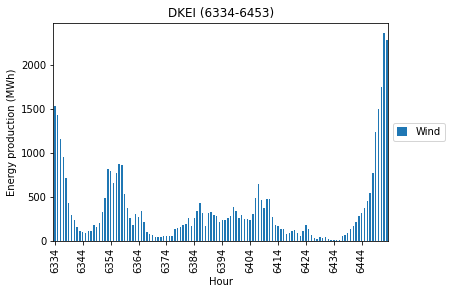

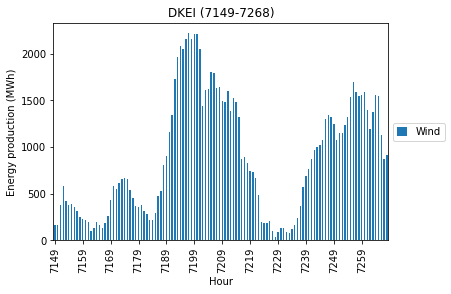

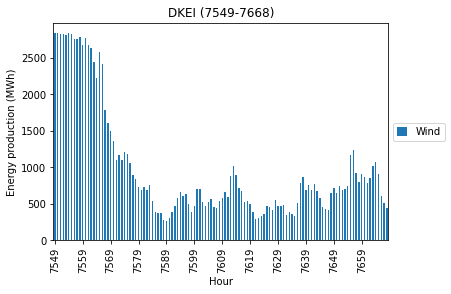

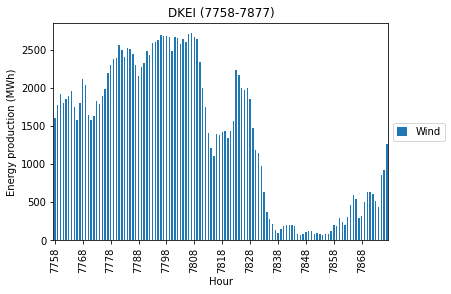

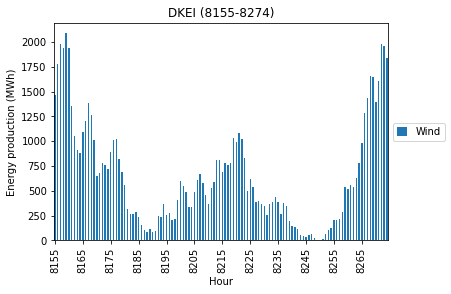

In [12]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'DKEI', period)

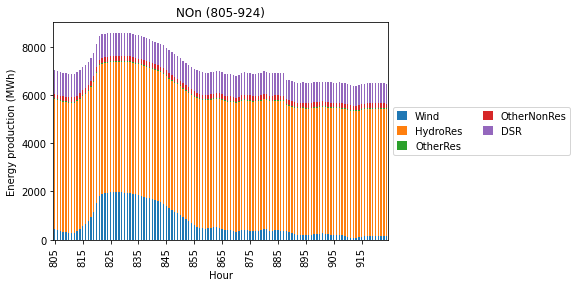

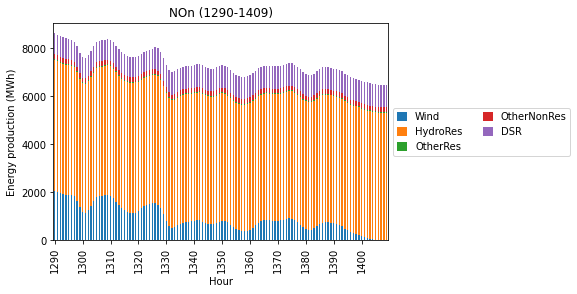

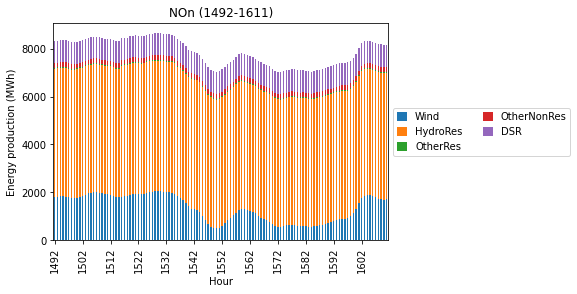

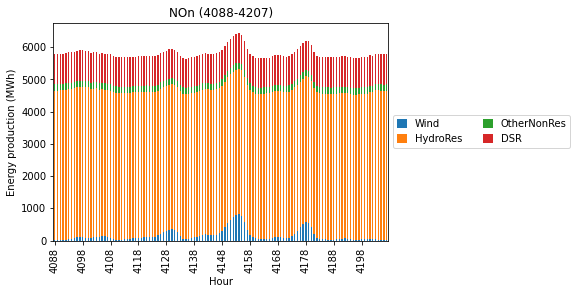

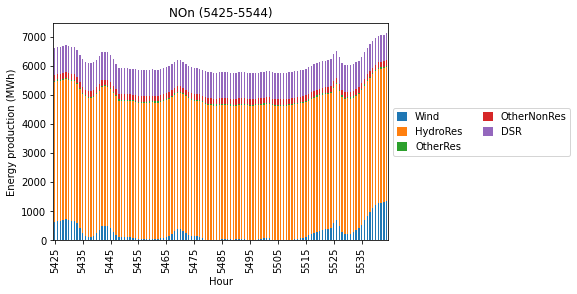

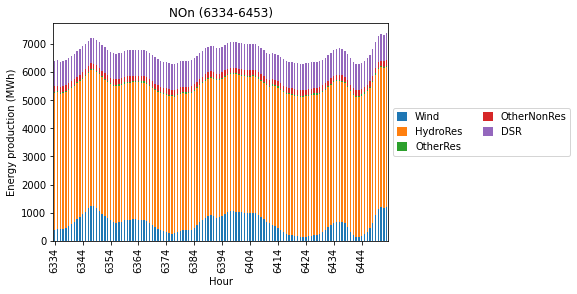

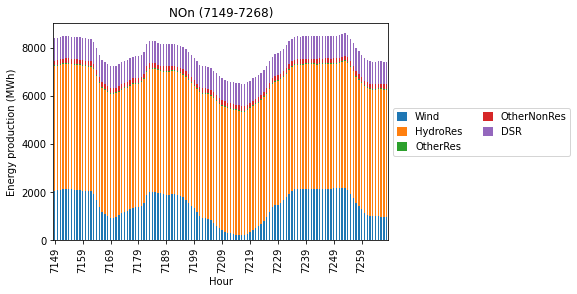

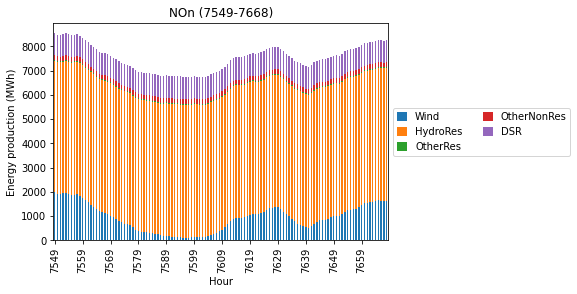

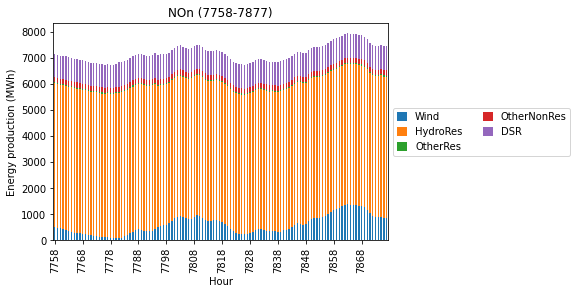

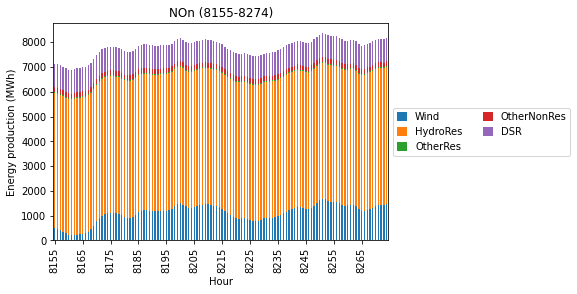

In [13]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'NOn', period)

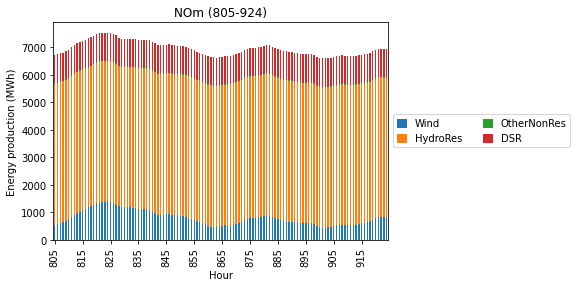

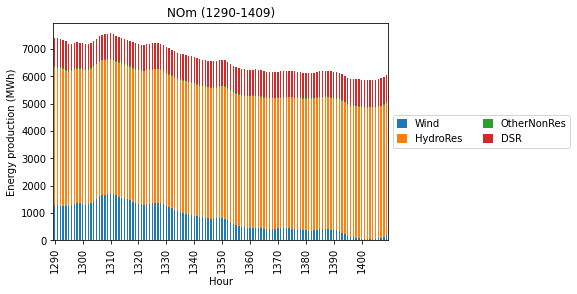

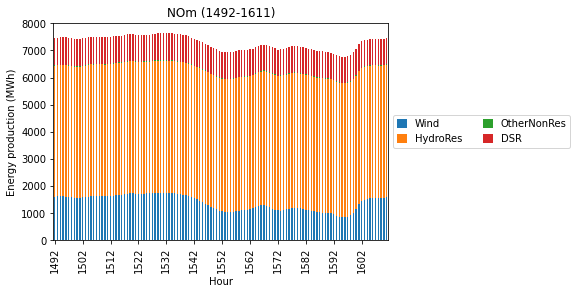

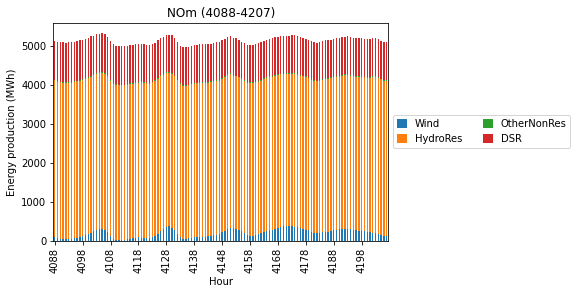

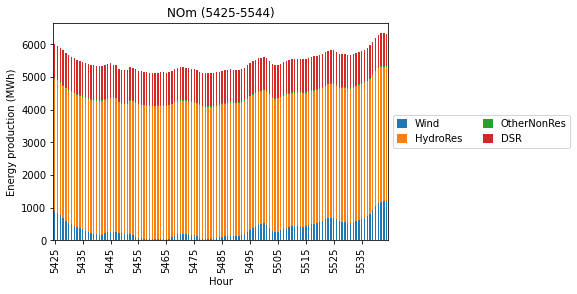

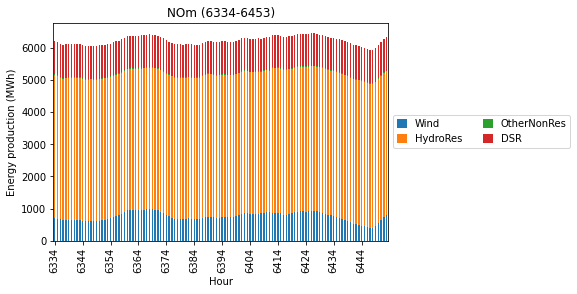

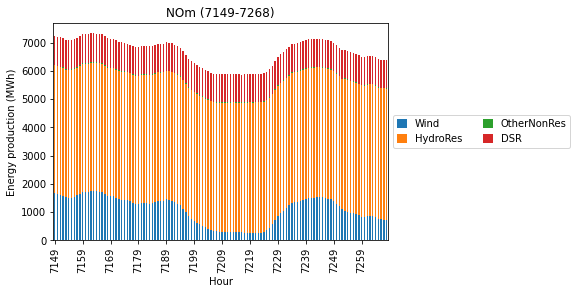

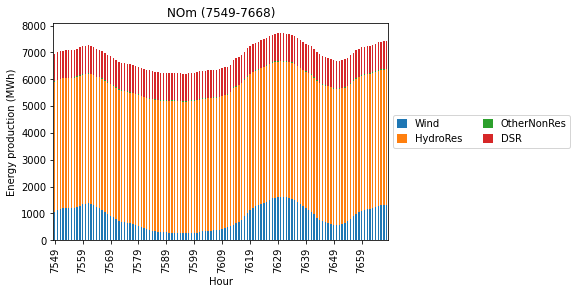

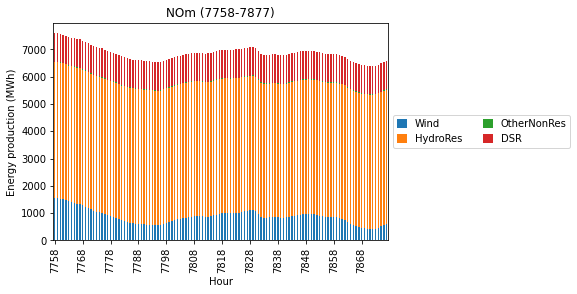

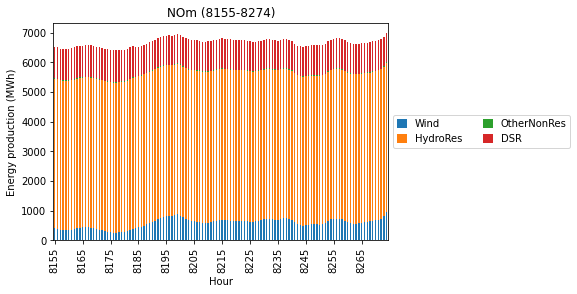

In [14]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'NOm', period)

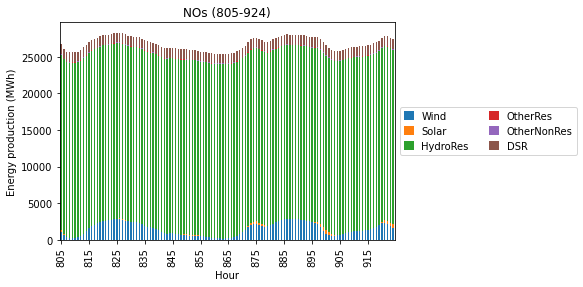

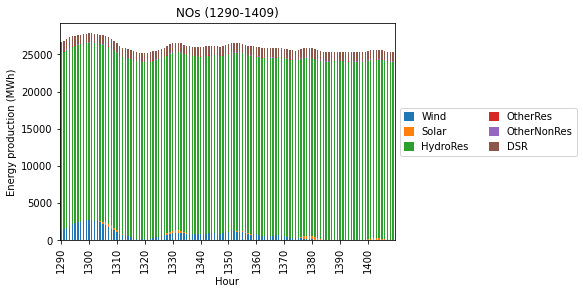

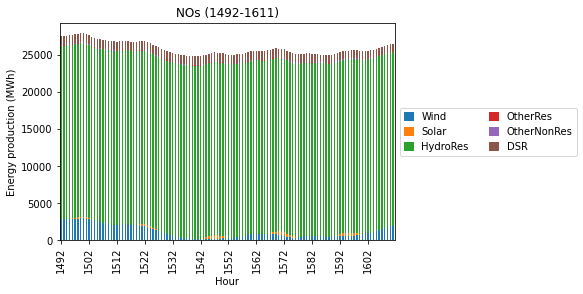

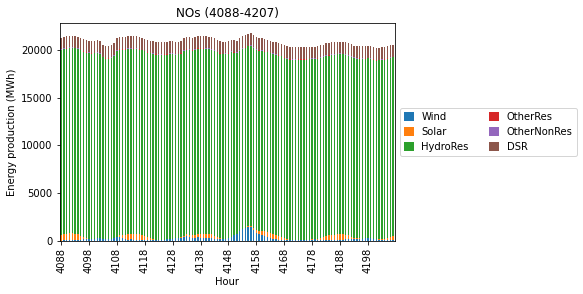

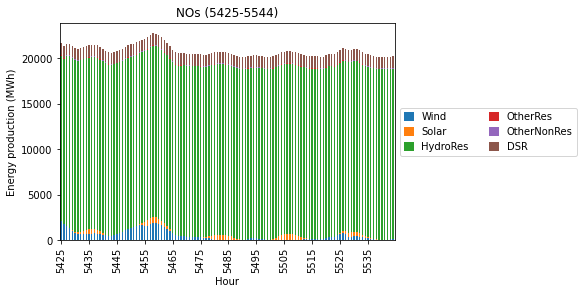

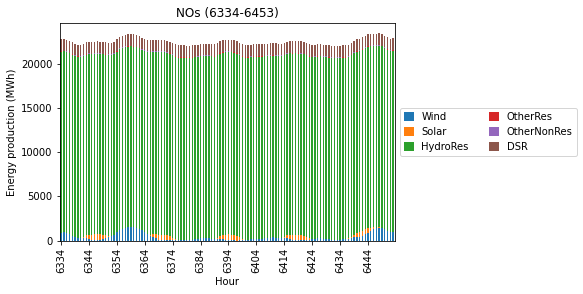

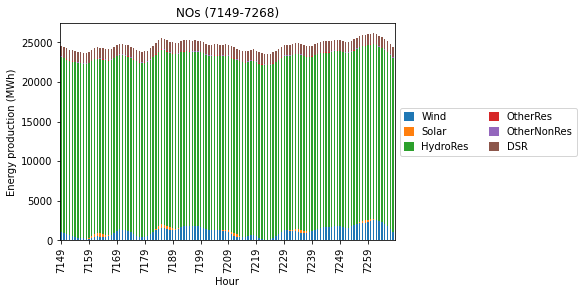

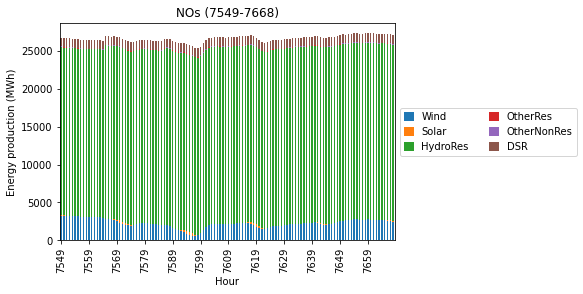

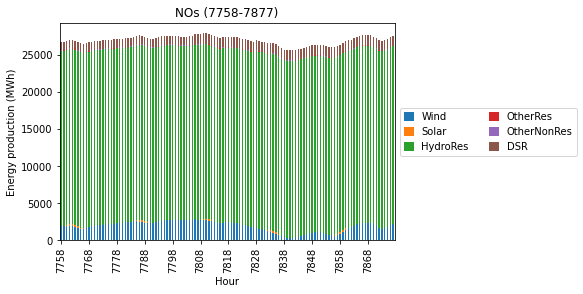

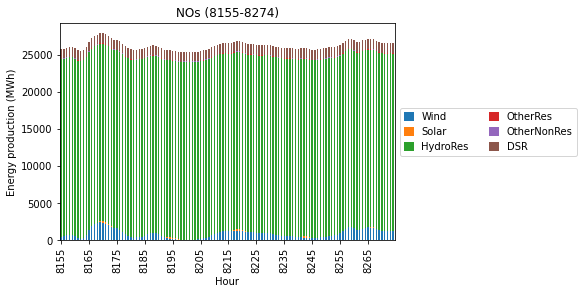

In [15]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'NOs', period)

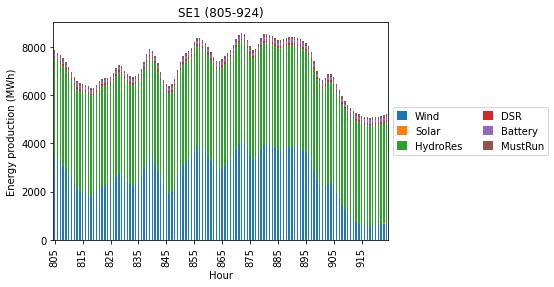

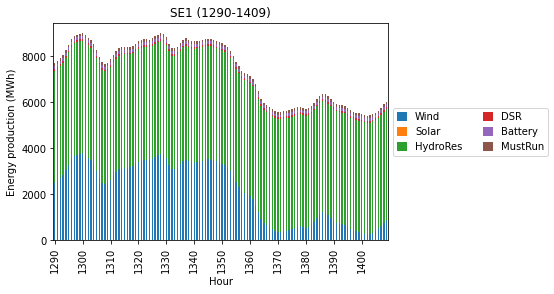

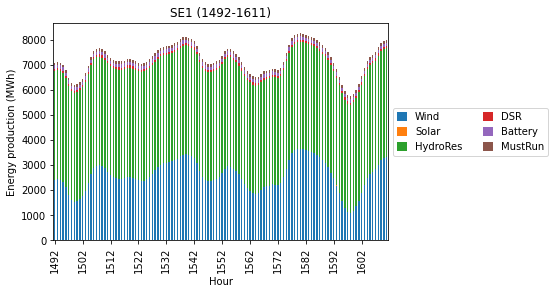

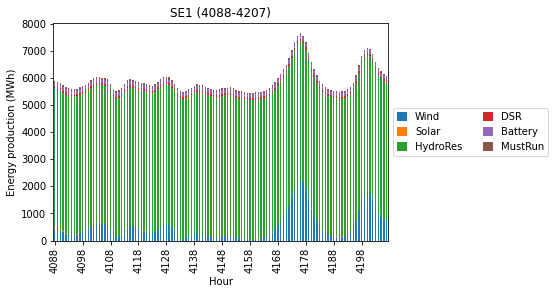

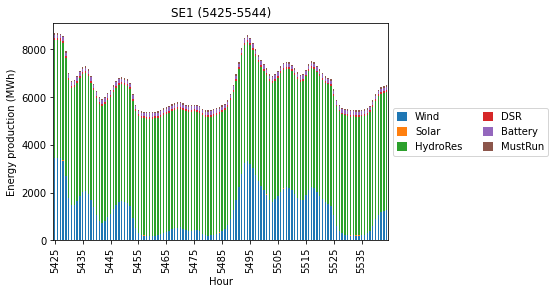

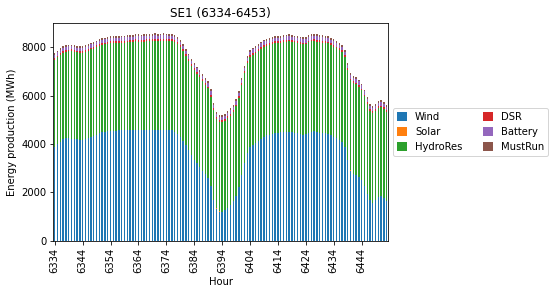

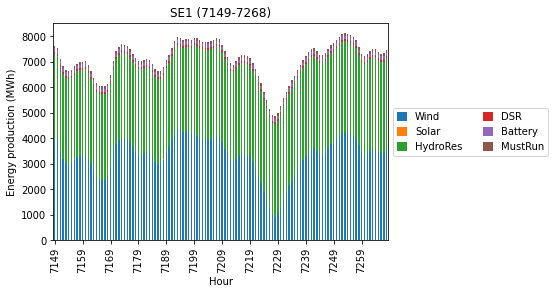

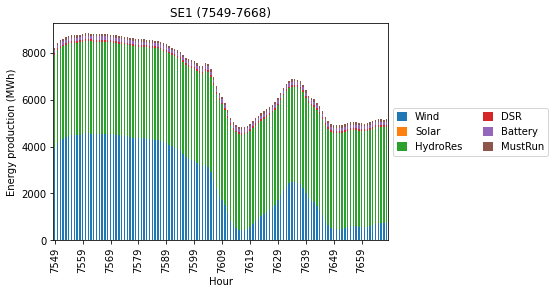

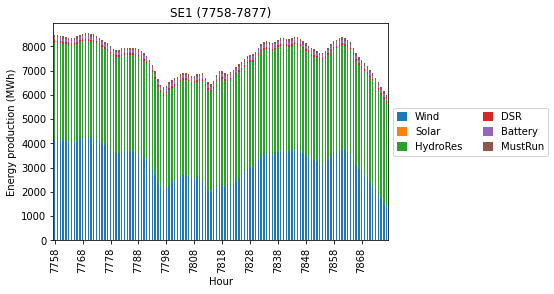

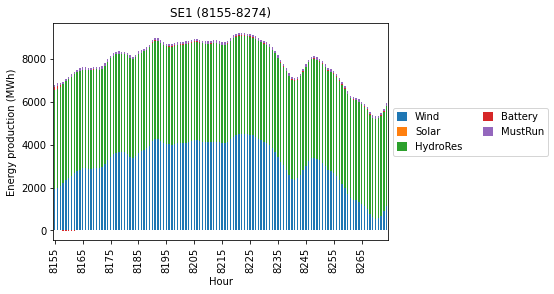

In [16]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'SE1', period)

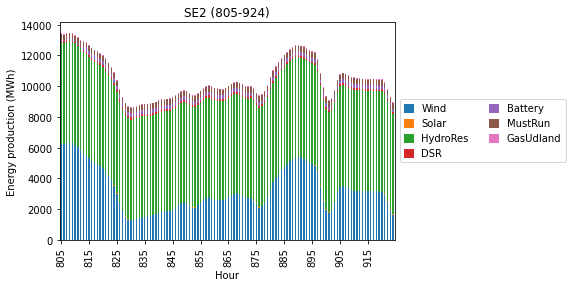

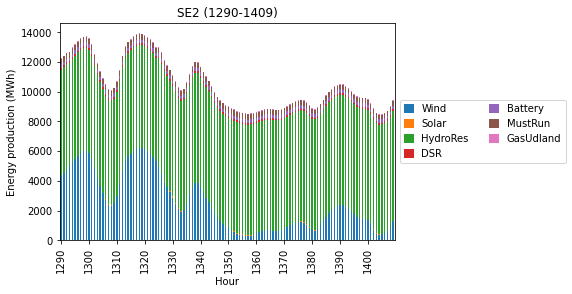

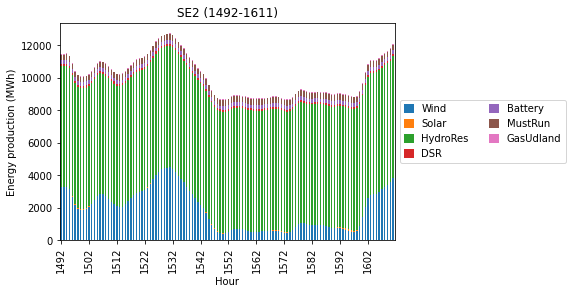

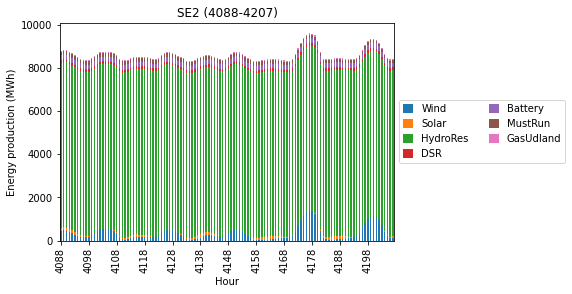

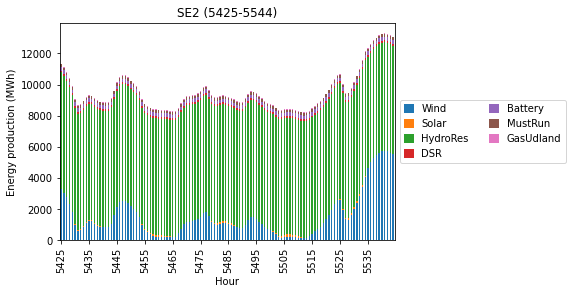

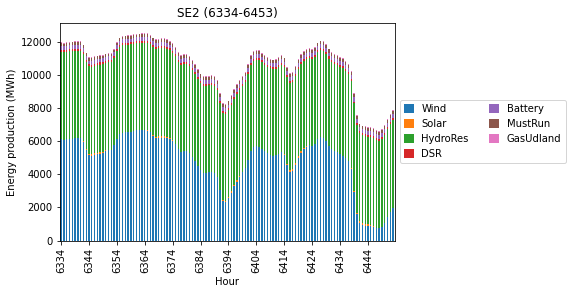

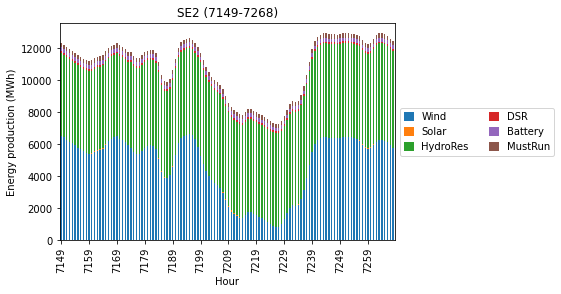

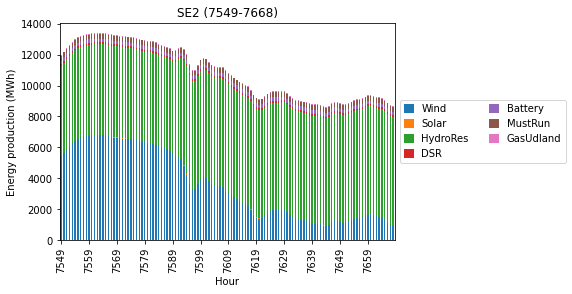

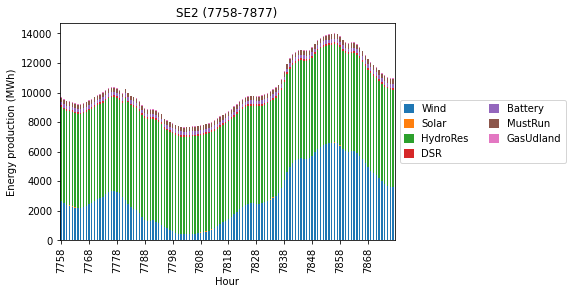

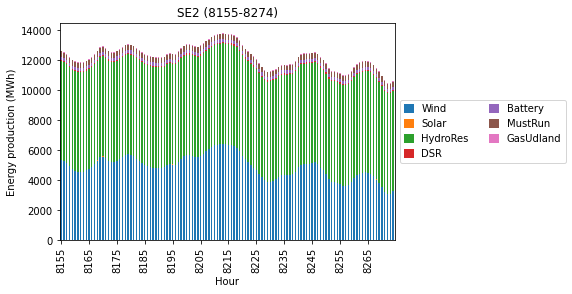

In [17]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'SE2', period)

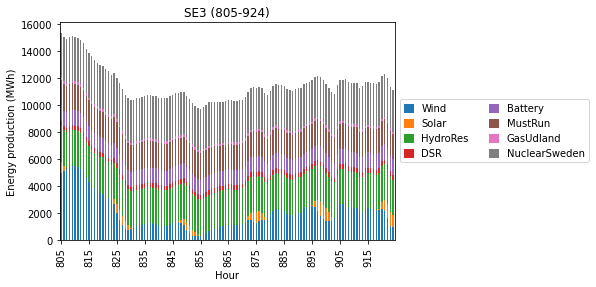

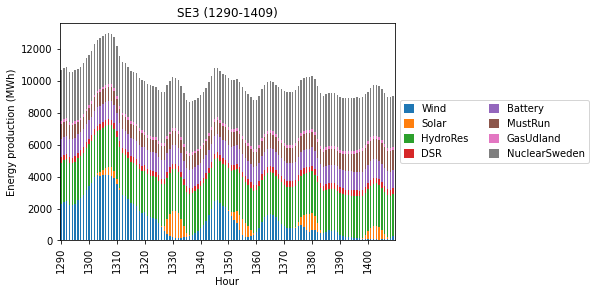

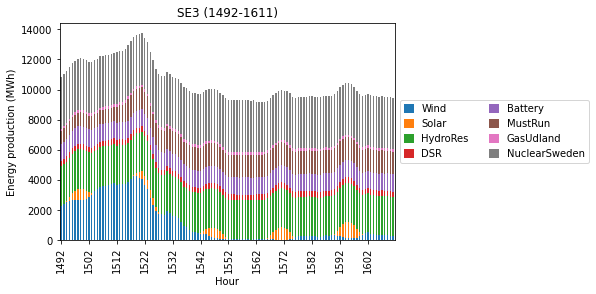

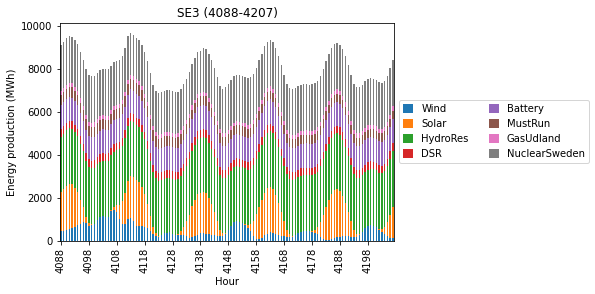

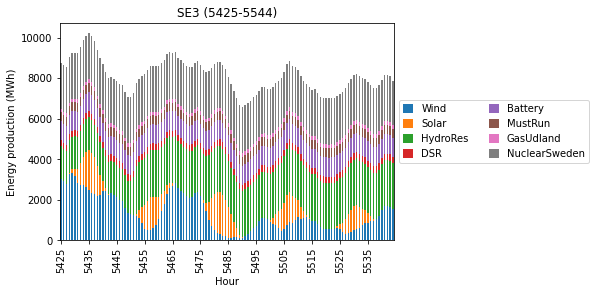

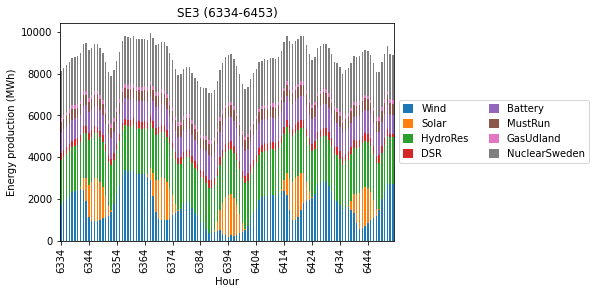

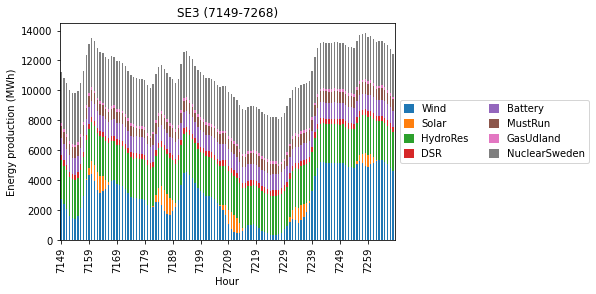

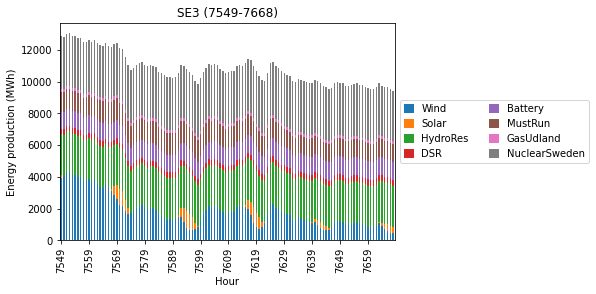

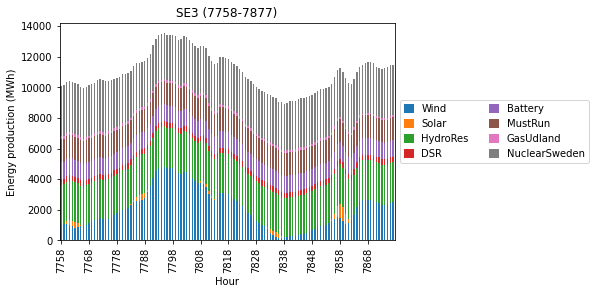

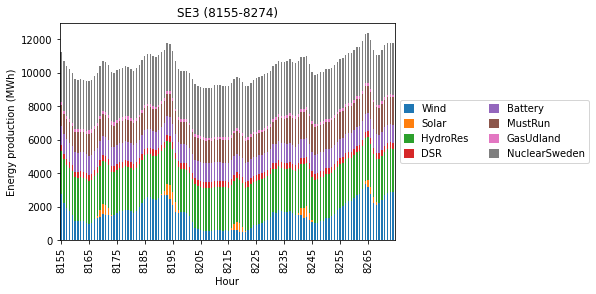

In [18]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'SE3', period)

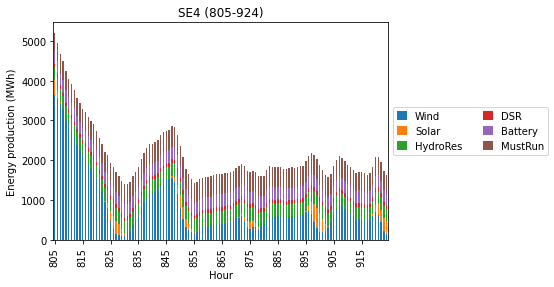

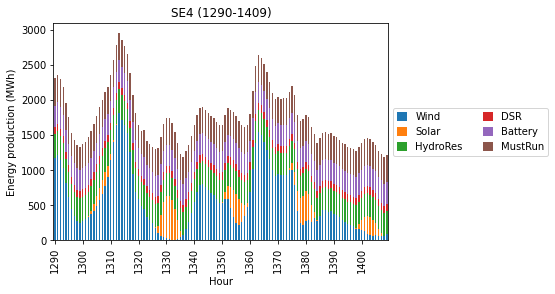

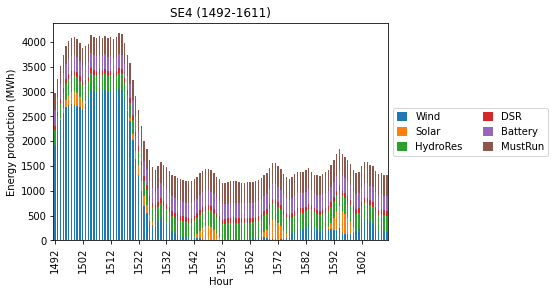

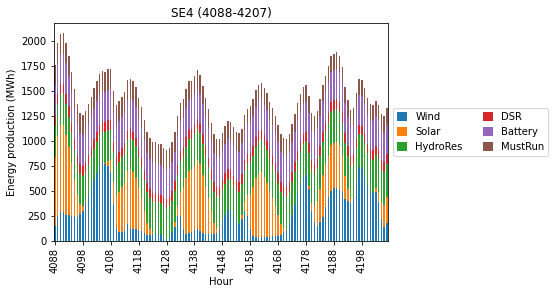

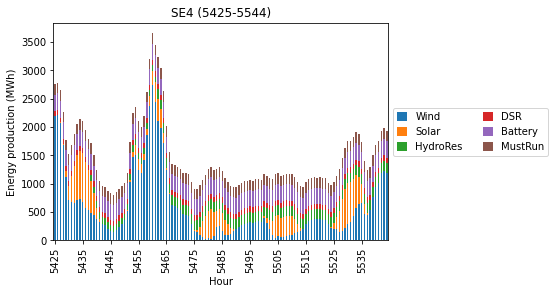

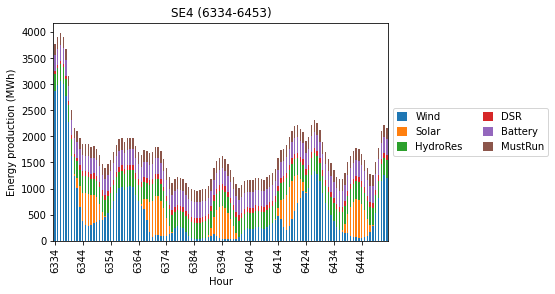

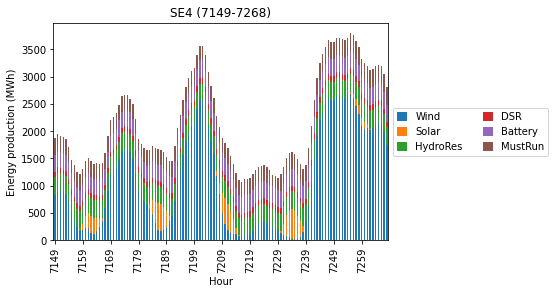

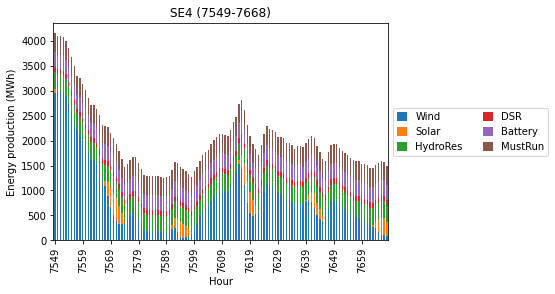

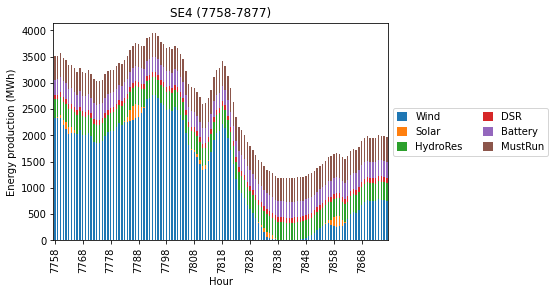

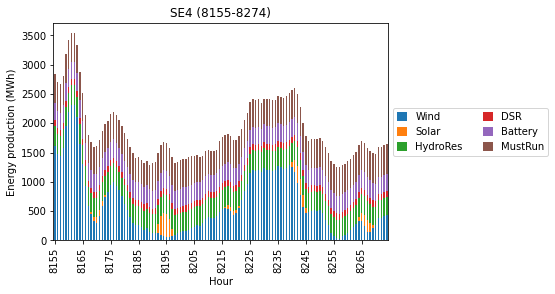

In [19]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'SE4', period)

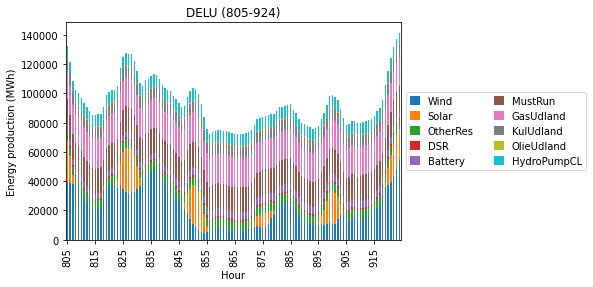

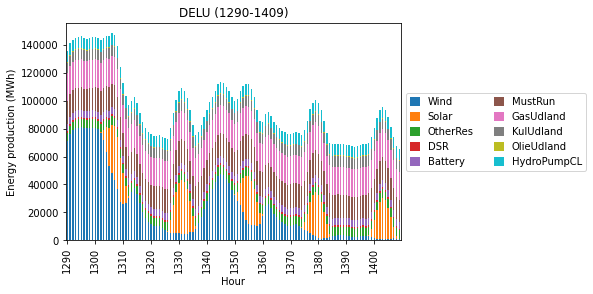

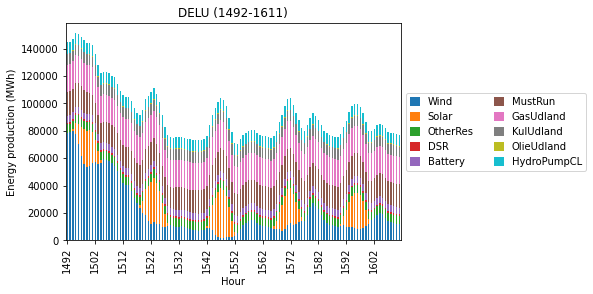

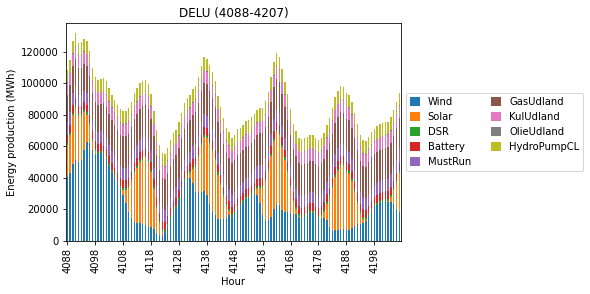

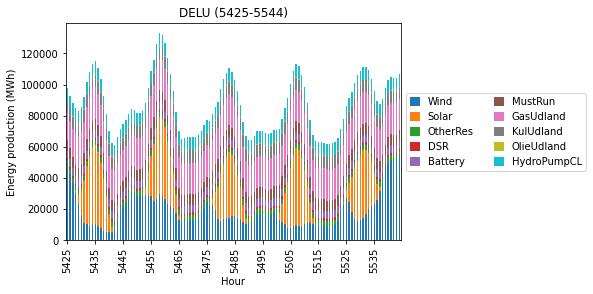

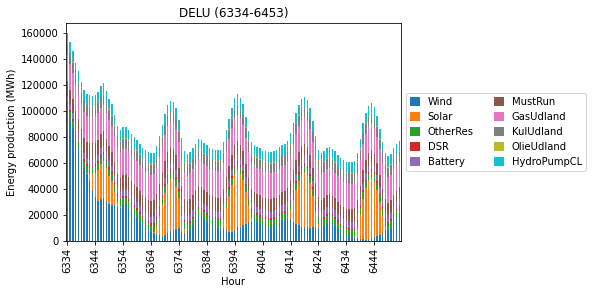

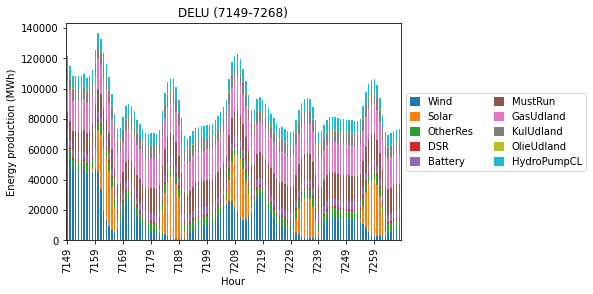

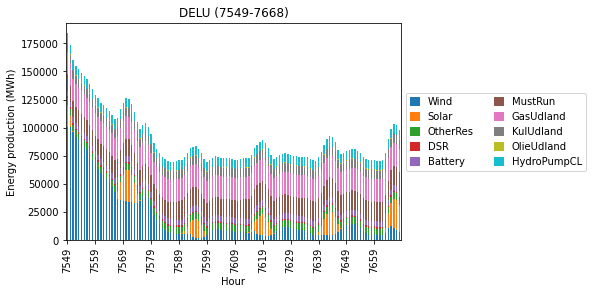

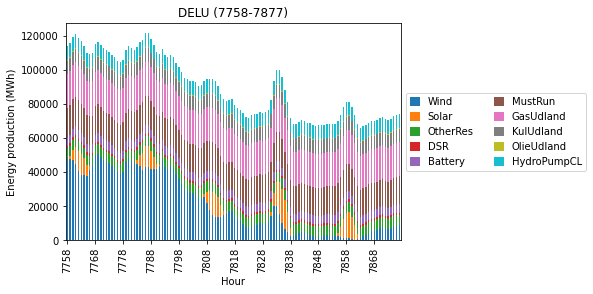

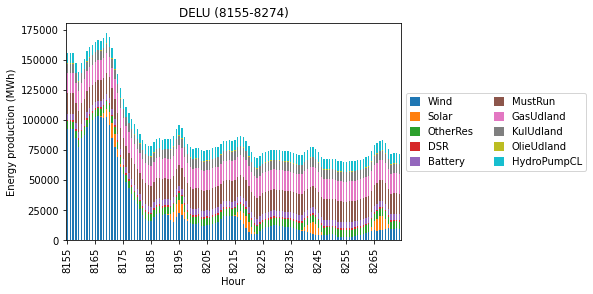

In [20]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'DELU', period)

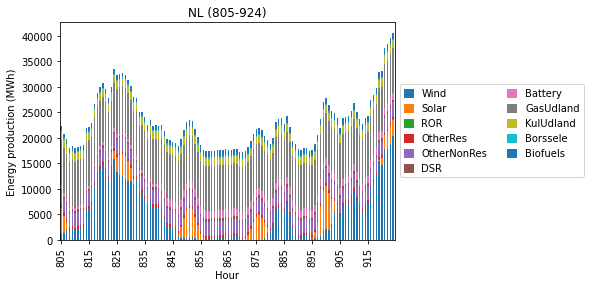

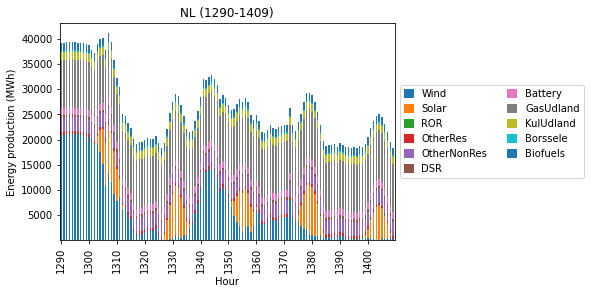

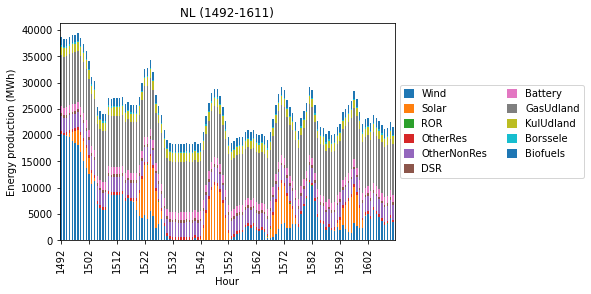

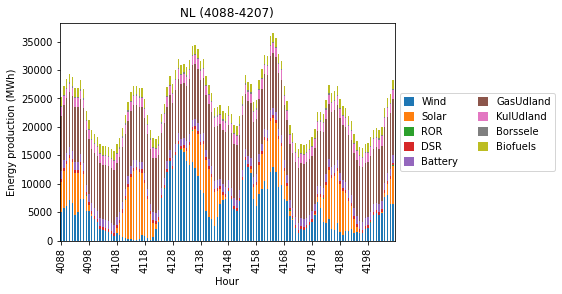

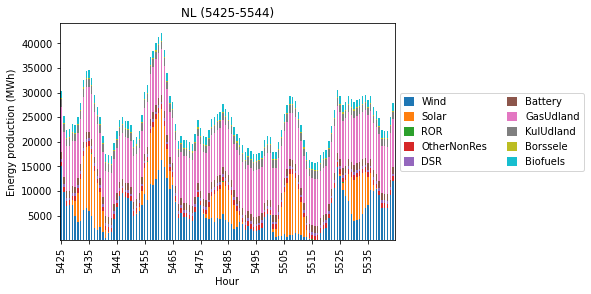

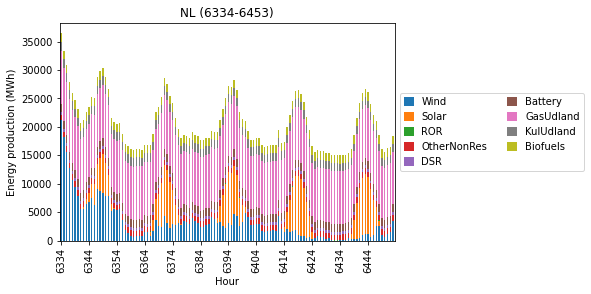

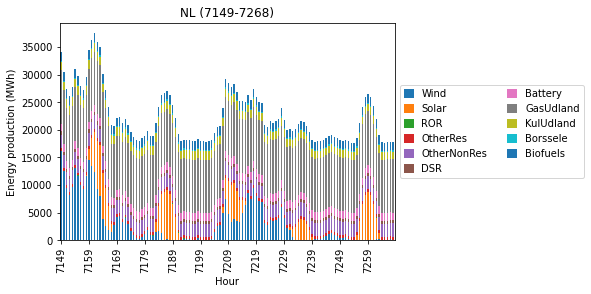

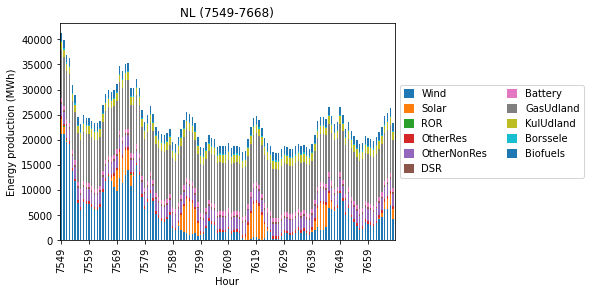

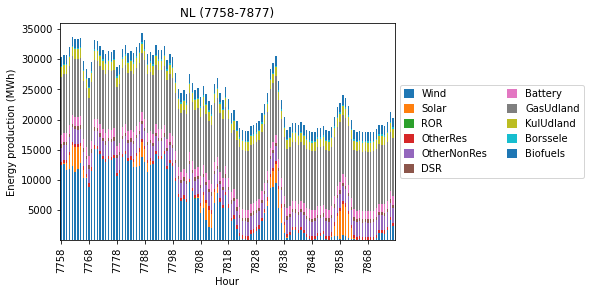

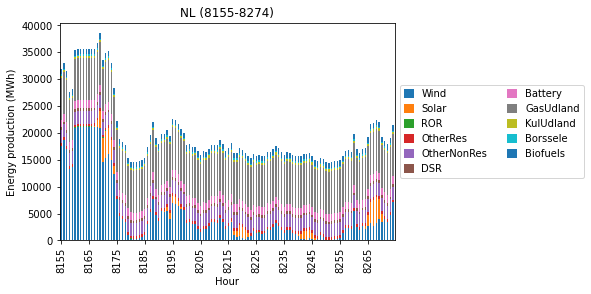

In [21]:
for period in low_energy:
    plot_stack_production(low_energy_rows_focus, 'NL', period)